import numpy as np


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
#read the dataset ' iris.csv'
df= pd.read_csv('iris-data.csv')
#returns the first n rows of the data based on the position
df.head()


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()
#Generate descriptive statistics.

#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

#Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#removing all null values now
df = df.dropna(subset= ['petal_width_cm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


c:\Users\mansi\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


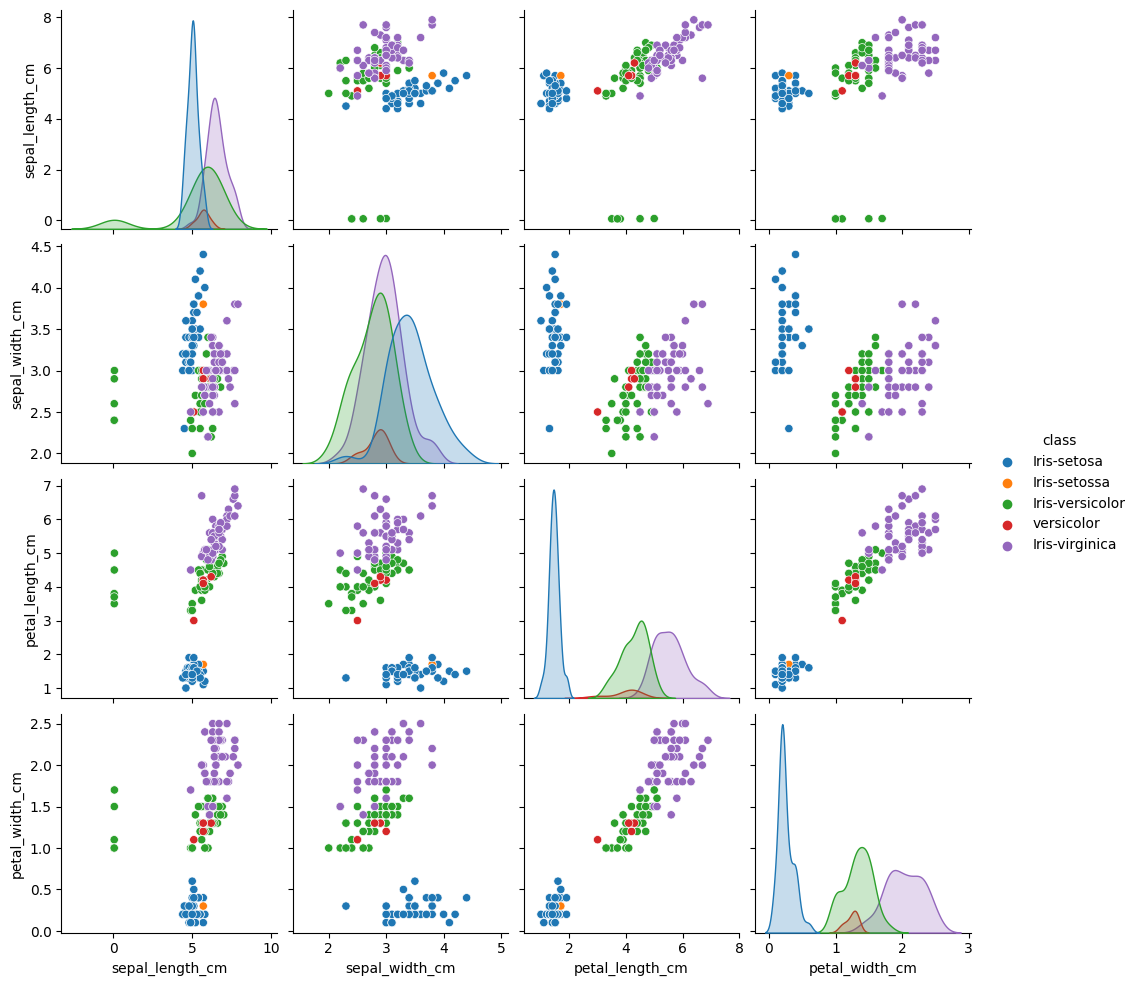

In [6]:
#plot
sns.pairplot(df , hue = 'class', size=2.5)
#seaborn pairplot allows us to plot pairwise relationships between variables withinn a dataset
#this creates a nice visuaaliztion and helps us understand the data by summarizing
#a large amount of data in a single figure.

In [7]:
df['class'].value_counts()
#inferences:
#a) for data-points , 'iris-versicolor' has been specified as 'versicolor'
#b) for 1 data-point 'iris-setosa' has been specified as 'iris-setossa'

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [8]:
#SIMPLE LOGISTIC REGRESSION
#consider only classes 'iris-setosa' and 'iris-versicolor'
final_df = df[df['class']!= 'Iris-virginica']
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


c:\Users\mansi\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


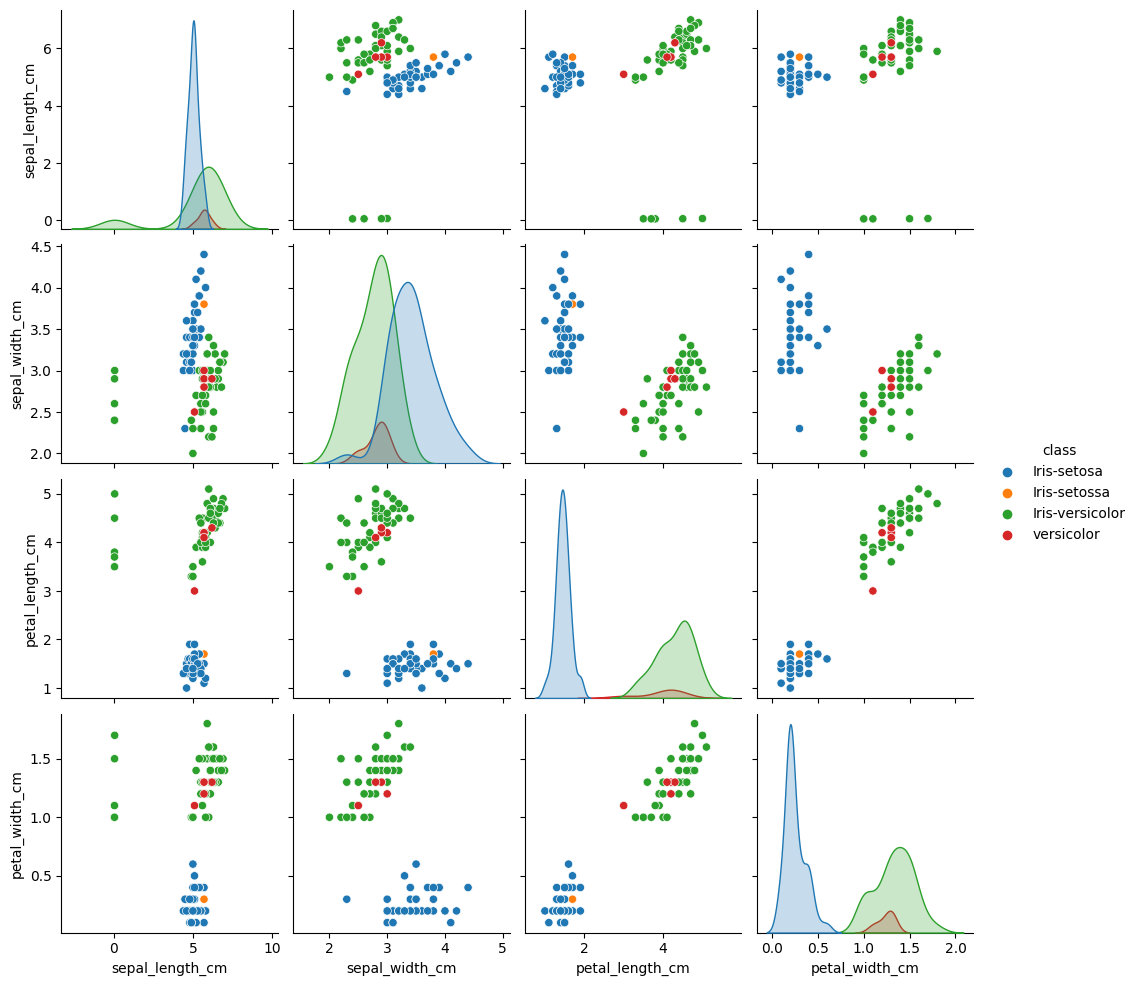

In [9]:
#outlier check
sns.pairplot(final_df , hue= 'class', size=2.5)

In [10]:
final_df.hist(column= 'sepal_length_cm'), bins = 20, figsize=(10,5)

SyntaxError: cannot assign to function call (3248803831.py, line 1)

array([[<Axes: title={'center': 'sepal_length_cm'}>]], dtype=object)

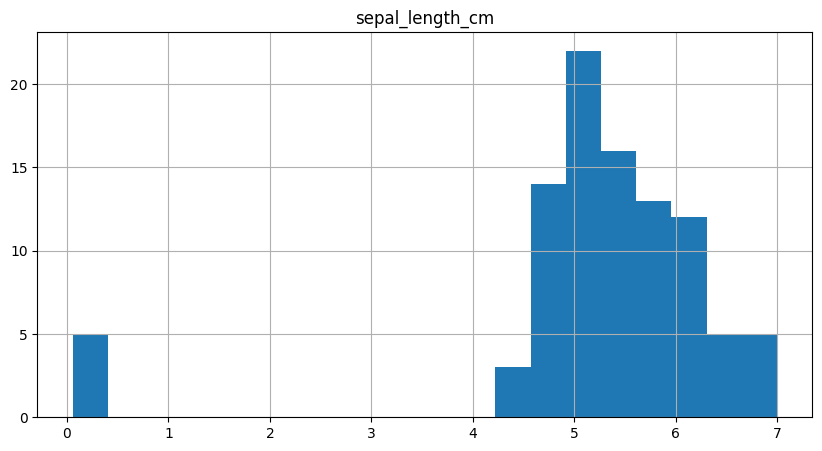

In [11]:
final_df.hist('sepal_length_cm', bins= 20, figsize= (10,5))

In [12]:
final_df = final_df.drop(final_df[(final_df['class']=="Iris-setosa") & (final_df['sepal_width_cm']<2.5)].index)

c:\Users\mansi\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


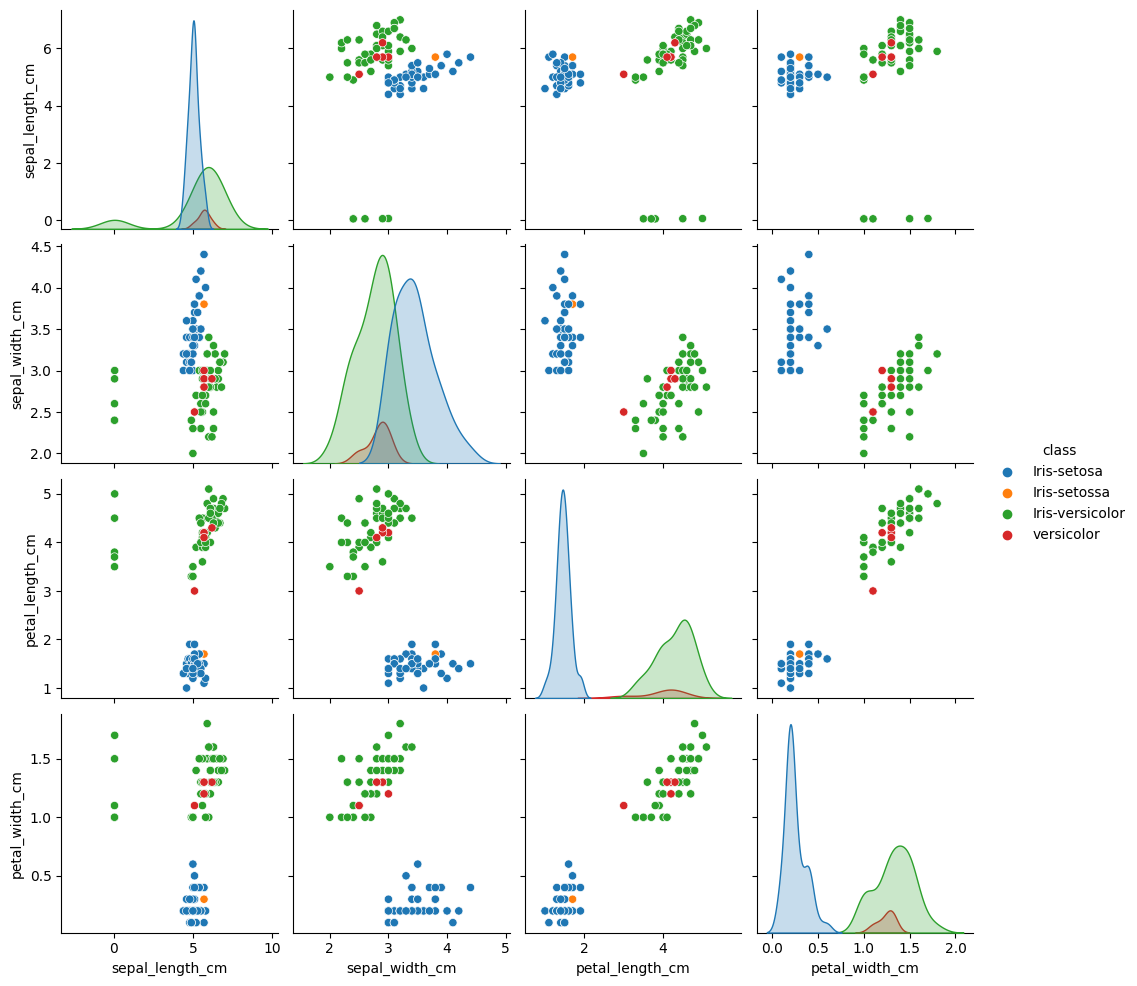

In [13]:
sns.pairplot(final_df , hue = 'class', size=2.5)

In [14]:
#label encoding
final_df['class'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True)
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [15]:
##MODEL CONSTRUCTION
inp_df = final_df.drop(final_df.columns[[4]], axis=1)
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis = 1)
#
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)

#
X_train, X_test , Y_train , Y_test = train_test_split(inp_df, out_df , test_size = 0.2, random_state =42)

In [24]:
X_tr_arr = X_train
X_ts_arr = X_test
Y_tr_arr = Y_train.values
Y_ts_arr = Y_test.values

#DataFrame.values attribute to return the numpy representation of the
# given dataframe .

In [25]:
print('Input Shape',(X_tr_arr.shape))
print('Output Shape', X_test.shape)
#Prints the values to a stream, or to sys.stdout by default. Optional keyword arguments:
#file: a file-like object (stream); defaults to the current sys.stdout.
#sep: string inserted between values, default a space.
#end: string appended after the last value, default a newline.
#flush: whether to forcibly flush the stream.

Input Shape (76, 4)
Output Shape (19, 4)


In [26]:
def weightInitialization(n_features):
    w = np.zeros((1, n_features))
    b= 0 
    return w,b

In [27]:
def sigmoid_activation(result):
    final_result = 1/(1+ np.exp(-result))
    return final_result

In [31]:
def model_optimize(w,b,X,Y):
    m = X.shape[0]

    #Prediction 
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)))+((1-Y_T)*(np.log(1-final_result))))

    #Gradient Calculation
    dw = (1/m)*(np.dot(X.T, (final_result - Y.T).T))
    db = (1/m)*(np.sum(final_sum - Y.T))

    grads = {"dw" : dw , "db": db}

    return grads , cost

In [38]:
def model_predict( w, b , X, Y, learning_rate , no_iteration):
    costs = []
    for i in range(no_iteration):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate*db)
        #

        if (i%100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))

    #final parameters
    coeff = {"W": w, "b":b}
    gradient = {"dw": dw , "db":db}

    return coeff , gradient , costs

In [39]:
def predict(final_pred , m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] >1.5 :
            y_pred[0][i] = 1
    return y_pred

In [40]:
#Get number of features 
n_features = X_tr_arr.shape[1]
print('Number of features',n_features)
w, b =weightInitialization(n_features)
#Gradient descent
coeff , gradient , costs = model_predict(w,b,  X_tr_arr, Y_tr_arr , learning_rate = 0.0001, no_iteration=4500)

#final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept', b)

#
final_train_pred = sigmoid_activation(np.dot(w, X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w, X_ts_arr.T)+b)

#
m_tr = X_tr_arr[0]
m_ts = X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred , m_tr)
print('Training Accuracy', accuracy_score(y_tr_pred.T , y_tr_arr))
#
y_ts_pred = predict(final_test_pred , m_ts)
print('Training Accuracy', accuracy_score(y_tr_pred.T , y_tr_arr))
#
y_ts_pred = predict(final_pred, m_ts)
print('Test Accuracy', accuracy_score(y_ts_pred.T , Y_ts_arr))



Number of features 4


TypeError: can't multiply sequence by non-int of type 'float'

In [41]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations(per hundreds)')
plt.title('Cost reduction over time')
plt.show ()

NameError: name 'costs' is not defined

In [42]:
from sklearn.linear_model import LogisticRegression


In [43]:
clf= LogisticRegression()
clf.fit(X_tr_arr, Y_tr_arr)

c:\Users\mansi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'unknown'

In [ ]:
print(clf.intercept_ , clf.coef_)

In [ ]:
pred = clg.predict(X_ts_arr)

In [ ]:
print('Accuracy from sk-learn:{0}'.format(clf.score(X_ts_arr, Y_ts_arr)))